**Ref**: https://www.youtube.com/watch?v=i4vGKgbtf1U

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator


In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [6]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
selected_cols = ['date', 'T_out', "RH_2", "Appliances", "lights"]
df['date'] = pd.to_datetime(df['date'])

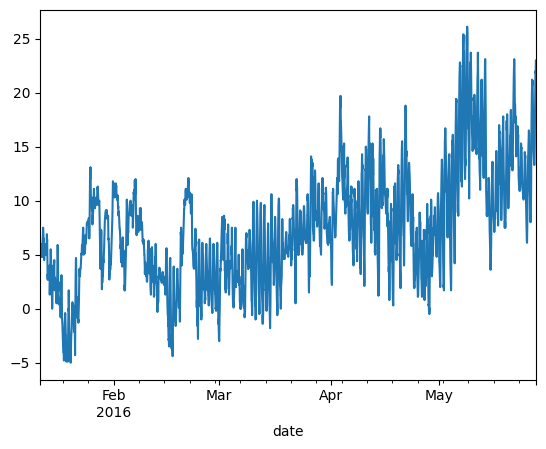

In [12]:
df.set_index('date')['T_out'].plot();

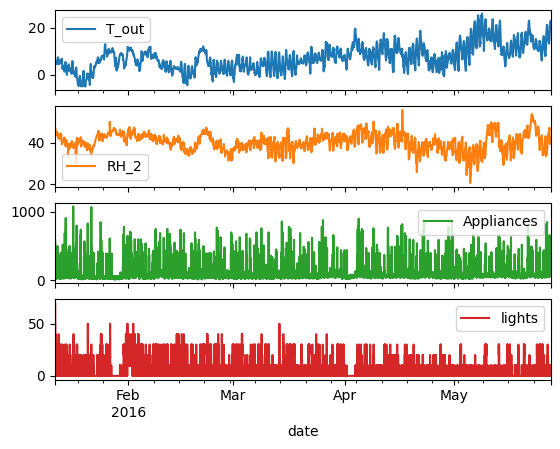

In [15]:
df.set_index('date')[['T_out', "RH_2", "Appliances", "lights"]].plot(subplots=True);

In [16]:
features = df[["RH_2", "Appliances", "lights"]].to_numpy().tolist()
target = df["Appliances"].tolist()

In [23]:
features[:10], target[:10]

([[44.79, 60.0, 30.0],
  [44.7225, 60.0, 30.0],
  [44.6266666666667, 50.0, 30.0],
  [44.59, 50.0, 40.0],
  [44.53, 60.0, 40.0],
  [44.5, 50.0, 40.0],
  [44.5, 60.0, 50.0],
  [44.5, 60.0, 50.0],
  [44.433333333333294, 60.0, 40.0],
  [44.4, 70.0, 40.0]],
 [60, 60, 50, 50, 60, 50, 60, 60, 60, 70])

In [41]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [42]:
ts_generator[0]

(array([[[44.79      , 60.        , 30.        ],
         [44.7225    , 60.        , 30.        ],
         [44.62666667, 50.        , 30.        ],
         [44.59      , 50.        , 40.        ],
         [44.53      , 60.        , 40.        ],
         [44.5       , 50.        , 40.        ]]]),
 array([60]))

In [44]:
ts_generator[0][0].shape, ts_generator[0][0][0].shape

((1, 6, 3), (6, 3))

In [47]:
len(ts_generator), df.shape

(19729, (19735, 29))

#### Sliding window:

Input: 1,2,3,4,5,6,7,8,9

Sliding window (window size 3, stride 1) -> 1,2,3 | 2,3,4  |  3,4,5 |  ... | 7,8,9 <br>
Sliding window (window size 3, stride 2) -> 1,2,3  |  3,4,5  |  5,6,7  |  7,8,9 <br>
Sliding window (window size 3) -> 1,2,3  |  4,5,6  |  7,8,9 <br>

In [48]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=2)

In [49]:
ts_generator[0]

(array([[[44.79      , 60.        , 30.        ],
         [44.7225    , 60.        , 30.        ],
         [44.62666667, 50.        , 30.        ],
         [44.59      , 50.        , 40.        ],
         [44.53      , 60.        , 40.        ],
         [44.5       , 50.        , 40.        ]]]),
 array([60]))

In [50]:
ts_generator[1]

(array([[[44.62666667, 50.        , 30.        ],
         [44.59      , 50.        , 40.        ],
         [44.53      , 60.        , 40.        ],
         [44.5       , 50.        , 40.        ],
         [44.5       , 60.        , 50.        ],
         [44.5       , 60.        , 50.        ]]]),
 array([60]))

In [59]:
# prepare data with multi-target
# last two rows will be NaN due to shift --> drop them. 
# The same will be applied on features when we want to create ts_generator (see the next following cells)
multi_target = pd.concat([df["Appliances"], df["Appliances"].shift(-1), df["Appliances"].shift(-2)], axis=1).dropna().to_numpy().tolist()

In [66]:
multi_target[:13]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0],
 [230.0, 580.0, 430.0],
 [580.0, 430.0, 250.0],
 [430.0, 250.0, 100.0]]

In [67]:

ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [68]:
ts_generator[0]

(array([[[44.79      , 60.        , 30.        ],
         [44.7225    , 60.        , 30.        ],
         [44.62666667, 50.        , 30.        ],
         [44.59      , 50.        , 40.        ],
         [44.53      , 60.        , 40.        ],
         [44.5       , 50.        , 40.        ]]]),
 array([[60., 60., 60.]]))

In [69]:
ts_generator[1]

(array([[[ 44.5       ,  60.        ,  50.        ],
         [ 44.5       ,  60.        ,  50.        ],
         [ 44.43333333,  60.        ,  40.        ],
         [ 44.4       ,  70.        ,  40.        ],
         [ 44.4       , 230.        ,  70.        ],
         [ 44.4       , 580.        ,  60.        ]]]),
 array([[430., 250., 100.]]))